### 1. Re-code the house price machine learning

In [1]:
%matplotlib inline

from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import pandas as pd
import random

data = load_boston()
df = pd.DataFrame(data['data'], columns=data['feature_names'])
y = data['target']
print(df.describe())
print(data['DESCR'])
X = df.RM # I choose RM column

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

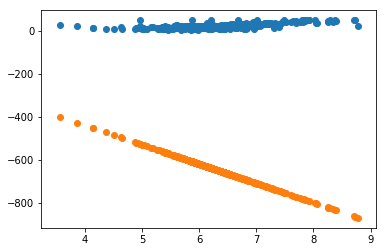

In [17]:
import random

def price(rm, k, b):
    """f(x) = k * x + b"""
    return k * rm + b

k = random.randint(-100, 100)
b = random.randint(-100, 100)
price_by_random_k_and_b = [price(r, k, b) for r in X]

plt.scatter(X, y)
# draw_rm_and_price()
plt.scatter(X, price_by_random_k_and_b)
plt.savefig("plot.png")

###### 1. Random Choose Method to get optimal *k* and *b*

For example, you can change the loss function: $Loss = \frac{1}{n} sum({y_i - \hat{y_i}})^2$ to $Loss = \frac{1}{n} sum(|{y_i - \hat{y_i}}|)$

And you can change the learning rate and observe the performance.

In [3]:
def RMSE(y, y_hat):
    return np.sqrt(sum((y - y_hat) ** 2) / len(y))

def MAE(y, y_hat):
    return sum(abs(y - y_hat)) / len(y)

def loss_random(X, y, n, loss=RMSE):
    loss_min = float('inf')
    k_best, b_best = 0, 0
    for i in range(n):
        k = random.random() * 200 - 100
        b = random.random() * 200 - 100
        y_hat = k * X + b
        loss_new = loss(y, y_hat)
        if loss_new < loss_min:
            loss_min = loss_new
            k_best, b_best = k, b
            print(f"round: {i}, k: {k_best}, b: {b_best}, {loss}: {loss_min}")
        
    return (k_best, b_best)
loss_random(X, y, 2000, RMSE)

round: 0, k: 4.402874158246391, b: 43.9869794773561, <function RMSE at 0x1a227b3378>: 49.6760472638054
round: 9, k: -6.164610809021909, b: 63.35799023513985, <function RMSE at 0x1a227b3378>: 12.758239429343842
round: 21, k: 7.399690002005215, b: -33.443699875605844, <function RMSE at 0x1a227b3378>: 11.608200130639993
round: 120, k: 15.726685151188917, b: -76.57825590792893, <function RMSE at 0x1a227b3378>: 8.080710915756143
round: 1007, k: 7.305008403497709, b: -19.71394884241468, <function RMSE at 0x1a227b3378>: 7.655457643047357


(7.305008403497709, -19.71394884241468)

###### 2.Supervised Direction to get optimal *k* and *b*

In [4]:
def loss_spvs_dr(X, y, n, alpha=0.1, loss=RMSE):
    loss_min = float('inf')
    direction = [(1, 1), (1, -1), (-1, 1), (-1, -1)]
    
    k = random.random() * 200 - 100
    b = random.random() * 200 - 100
    
    for i in range(n):
        dr_k, dr_b = random.choice(direction) # random walk. Can we walk 4 directions and compare which one is the best?
        k_new = k + dr_k * alpha
        b_new = b + dr_b * alpha
        y_hat = k_new * X + b_new
        loss_new = loss(y, y_hat)
        if loss_new < loss_min:
            k, b = k_new, b_new
            k_best, b_best = k_new, b_new
            loss_min = loss_new
            print(f"round: {i}, k: {k_best}, b: {b_best}, {loss}: {loss_min}")
    return (k_best, b_best)
loss_spvs_dr(X, y, 2000)

round: 0, k: 13.714813589436014, b: -59.465921698424935, <function RMSE at 0x1a227b3378>: 8.46593882601321
round: 1, k: 13.614813589436014, b: -59.56592169842494, <function RMSE at 0x1a227b3378>: 8.102038367978507
round: 4, k: 13.514813589436015, b: -59.66592169842494, <function RMSE at 0x1a227b3378>: 7.790064383178364
round: 6, k: 13.414813589436015, b: -59.56592169842494, <function RMSE at 0x1a227b3378>: 7.592215792772355
round: 7, k: 13.314813589436016, b: -59.465921698424935, <function RMSE at 0x1a227b3378>: 7.427434234677676
round: 16, k: 13.214813589436016, b: -59.56592169842494, <function RMSE at 0x1a227b3378>: 7.269085330339243
round: 17, k: 13.114813589436016, b: -59.465921698424935, <function RMSE at 0x1a227b3378>: 7.191163175359859
round: 18, k: 13.014813589436017, b: -59.56592169842494, <function RMSE at 0x1a227b3378>: 7.157975160853071


(13.014813589436017, -59.56592169842494)

#### Walk through all 4 directions and find the smallest loss

###### 3.Gradient Descent to get optimal *k* and *b*

#### Equations:

$$ RMSE = \frac{1}{n}\sum{(y - (kx+b))^2} = \frac{1}{n}\sum(y^2 -2y(kx+b) + (kx+b)^2)) = \frac{1}{n}\sum{y^2 - 2yxk - 2yb + k^2x^2 + 2kxb + b^2}$$

$$ \frac{\partial{_{loss}}}{\partial{_k}} = \frac{2}{n}(-y + kx + b)x = \frac{2}{n}(-y + \hat{y})x$$

$$ \frac{\partial{_{loss}}}{\partial{_b}} = \frac{2}{n}(-y + kx + b) = \frac{2}{n}(-y + \hat{y})$$

In [5]:
def partial_k(x, y, y_hat):
    n = len(y)
    gradient = 0
    for x_i, y_i, y_hat_i in zip(list(x), list(y), list(y_hat)):
        gradient += (y_i - y_hat_i) * x_i
    return -2 / n * gradient

def partial_b(y, y_hat):
    n = len(y)
    gradient = 0
    for y_i, y_hat_i in zip(list(y), list(y_hat)):
        gradient += (y_i - y_hat_i)
    return -2 / n * gradient

def gradient(X, y, n, alpha=0.01, loss=RMSE):
    loss_min = float('inf')
    
    k = random.random() * 200 - 100
    b = random.random() * 200 - 100
    
    for i in range(n):
        y_hat = k * X + b
        loss_new = RMSE(y, y_hat)
        if loss_new < loss_min:
            loss_min = loss_new
            if i % 1000 == 0:
                print(f"round: {i}, k: {k}, b: {b}, {loss.__name__}: {loss_min}")
        k_gradient = partial_k(X, y, y_hat)
        b_gradient = partial_b(y, y_hat)
        k += -k_gradient * alpha
        b += -b_gradient * alpha
    return (k, b)
gradient(X, y, 20000)

round: 0, k: 11.156848907834998, b: 34.487763921710496, RMSE: 82.34950118756377
round: 1000, k: 0.7992544802908168, b: 18.144816520920383, RMSE: 8.830002354522238
round: 2000, k: 2.5741248302688047, b: 6.854656772828753, RMSE: 8.052691129081738
round: 3000, k: 3.9695877416492, b: -2.02204748459325, RMSE: 7.532171608121235
round: 4000, k: 5.066747732553548, b: -9.001211662234999, RMSE: 7.1915873010742555
round: 5000, k: 5.929371909680884, b: -14.488465850944893, RMSE: 6.972735132505126
round: 6000, k: 6.607596122314869, b: -18.802730104531825, RMSE: 6.833944311505154
round: 7000, k: 7.140838865562368, b: -22.194750122134536, RMSE: 6.746721061248803
round: 8000, k: 7.560092289325878, b: -24.861670626656508, RMSE: 6.692234282732166
round: 9000, k: 7.889723466802294, b: -26.95849344625369, RMSE: 6.65832954708607
round: 10000, k: 8.14889061250885, b: -28.607086244324975, RMSE: 6.63728425749704
round: 11000, k: 8.35265656064489, b: -29.90326548677261, RMSE: 6.624241388379993
round: 12000, k:

(9.016067269426474, -34.12329929421756)

###### 4. Try different Loss function and learning rate. 

$$ MAE = \frac{1}{n}\sum{|y - \hat{y}|} = \frac{1}{n}{\sum{|y - (kx+b)}|} $$

$$ \frac{\partial{loss}}{\partial{k}} = \frac{1}{n}{\sum{\left\{
\begin{array}{rcl}
-x       &      & {y - \hat{y} > 0}\\
x     &      & {y - \hat{y} < 0}
\end{array} \right.}} $$

$$ \frac{\partial{loss}}{\partial{b}} = \frac{1}{n}{\sum {\left\{
\begin{array}{rcl}
-1       &      & {y - \hat{y} > 0}\\
1     &      & {y - \hat{y} < 0}
\end{array} \right.}} $$

In [6]:
# gradient(X, y, 20000, alpha=0.1) # overflow
print("\n")
# gradient(X, y, 20000, alpha=1) # overflow
print("\n")

def partial_k(x, y, y_hat):
    n = len(x)
    gradient = 0
    for xi, y_i, y_hat_i in zip(x, y, y_hat):
        if y_i - y_hat_i > 0:
            gradient += xi
        else:
            gradient -= xi
    return -1 / n * gradient

def partial_b(y, y_hat):
    n = len(y)
    gradient = 0
    for y_i, y_hat_i in zip(y, y_hat):
        if y_i - y_hat_i > 0:
            gradient += 1
        else:
            gradient -= 1
    return -1 / n
# MAE with default alpha
gradient(X, y, 20000, loss=MAE) 





round: 0, k: 28.308544542429104, b: -0.4267794138153249, MAE: 155.6747402772041


(3.515829285509879, -0.03152249681912336)

In [7]:
# MAE with alpha = 0.1
gradient(X, y, 20000, loss=MAE, alpha=0.1)

round: 0, k: -30.01445269214335, b: -15.64018088986063, MAE: 228.55416939727533


(5.4182405884896205, -11.68761171990684)

In [8]:
# MAE with alpha = 0.5
gradient(X, y, 20000, loss=MAE, alpha=1)

round: 0, k: 36.23549466060345, b: 96.29156913823226, MAE: 302.1587316166799


(-19.536868975768993, 135.81726083785605)